<a href="https://colab.research.google.com/github/AnnaTumanova/PSO/blob/main/Lab2_dz_signals_en_s21424.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1D signals

We will use this lab to start analyzing simple 1D signals. We will start with initializing Matplotlib and Numpy (run the block below):  

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Initial tasks - simple signals

Reproduce the following functions. Assume the range $<0,20>$ for $x$.

### Step function

![](https://raw.githubusercontent.com/danijel3/PSO_lecture/master/%C4%87wiczenia/step.png)

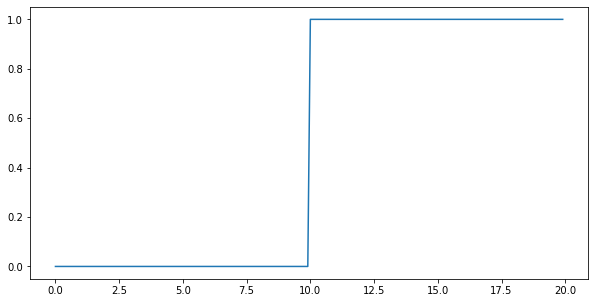

In [3]:
x=arange(0,20,0.1)
y=zeros(x.shape)
y[100:]=1
figure(figsize=(10,5))
plot(x,y)

### Pulse (use "stem" to draw)

![](https://raw.githubusercontent.com/danijel3/PSO_lecture/master/%C4%87wiczenia/impulse.png)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


<StemContainer object of 3 artists>

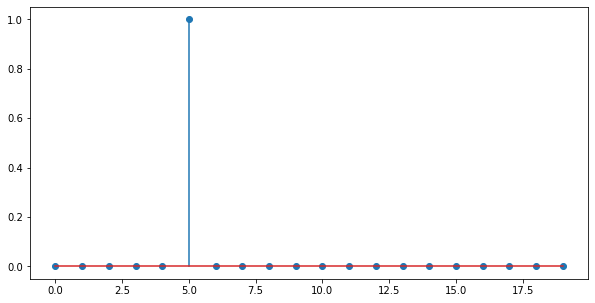

In [4]:
x=arange(0,20,1)
y=zeros(x.shape)
y[5]=1
figure(figsize=(10,5))
stem(x,y)

### Square wave

![](https://raw.githubusercontent.com/danijel3/PSO_lecture/master/%C4%87wiczenia/square.png)

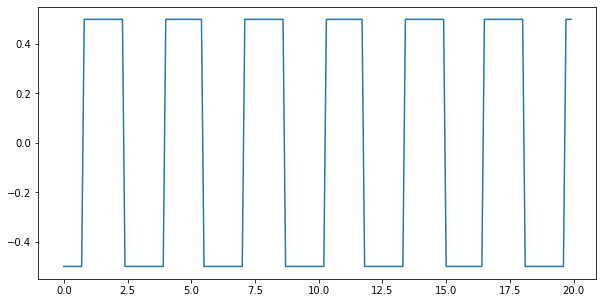

In [5]:
x=arange(0,20,0.1)
y=sign(-cos(x*2))/2
figure(figsize=(10,5))
plot(x,y)


### Sawtooth wave

![](https://raw.githubusercontent.com/danijel3/PSO_lecture/master/%C4%87wiczenia/sawtooth.png)

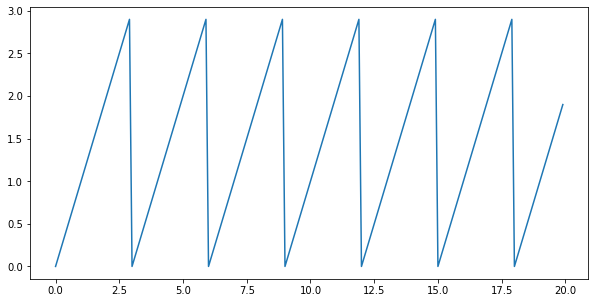

In [6]:
x=arange(0,20,0.1)
N=3
y=fmod(x, N)
figure(figsize=(10,5))
plot(x,y)

### Triangle wave

![](https://raw.githubusercontent.com/danijel3/PSO_lecture/master/%C4%87wiczenia/triangle.png)

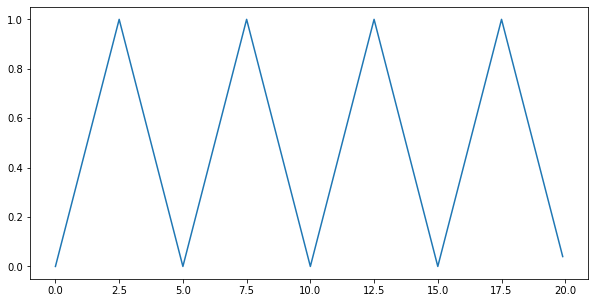

In [7]:
x=arange(0,20,0.1)
N=5
y=-abs(fmod(x, N)/N-0.5)*2+1
figure(figsize=(10,5))
plot(x,y)

## Sine wave

Draw a sine wave using the following parameters:

* Amplitude: 2
* Frequency: 5 Hz
* Phase: $\pi/2$ rad
* Duration: 3 s
* Sampling frequency: 100 Hz

Try other settings to see how they affect the signal.

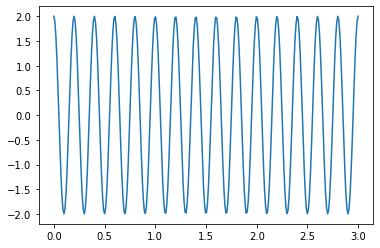

In [8]:
A=2
f=5
ph=pi/2
T=3
Fs=100

t=arange(0,T,1/Fs)
t=linspace(0,T,T*Fs)

y=A*sin(2*pi*f*t+ph)

plot(t,y)

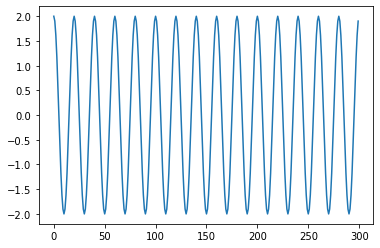

In [9]:
A=2
f=5
ph=pi/2
T=3
Fs=100

N=T*Fs
n=arange(0,N)

y=A*sin(2*pi*f*n/Fs+ph)

plot(n,y)

Now make 1 second of the signal sampled at 48 kHz with a frequency of 300 Hz. Play it back in an HTML5 component. Try other frequencies to learn how they sound.

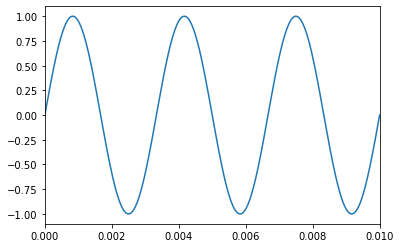

In [10]:
T=1
Fs=48000
f=300
A=1
ph=0

t=arange(0,T,1/Fs)
t=linspace(0,T,T*Fs)

y=A*sin(2*pi*f*t+ph)

plot(t,y)
xlim(0,0.01)

from IPython.display import Audio

Audio(y,rate=Fs)

## Modulation

### Amplitude modulation - AM

Amplitude modulation is based on replacing the amplitude constant of the carrier signal with the values of the modulating signal. Let's take a 3 second signal with frequency of 30 Hz sampled at 1 kHz. Modulate its amplitude using a signal with the frequency of 2 Hz and draw the result below.

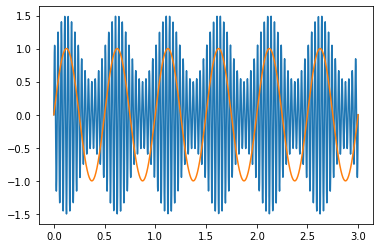

In [11]:
T=3
Fs=1000

fc=30
fm=2

t=linspace(0,T,T*Fs)

N=0.5

ym=sin(2*pi*fm*t)
yc=(1+N*ym)*sin(2*pi*fc*t)

plot(t,yc)
plot(t,ym)


Generate and play back a modulated signal with a carrier frequency of 500 Hz modulated by a sine with the frequency of 3 Hz. Set the M parameter to 0.5

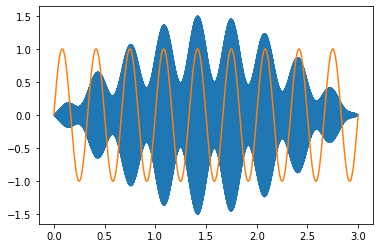

In [12]:
T=3
Fs=1000

fc=500
fm=3

t=linspace(0,T,T*Fs)

N=0.5

ym=sin(2*pi*fm*t)
yc=(1+N*ym)*sin(2*pi*fc*t)

plot(t,yc)
plot(t,ym)

Audio(yc,rate=Fs)

### Frequency modulation - FM

Frequency modulation is similar to amplitude modulation but instead of the amplitude, we modulate the frequency of the carrier signal. Using the same parameters as the previous task (3s, 30Hz, Fs=1kHz)  perform frequency modulation below.

Please note that the range of amplitude of the modulating signal is converted to frequencies, so it should be multiplied by a factor to be noticeable by ear (at least 10, 20 Hz).

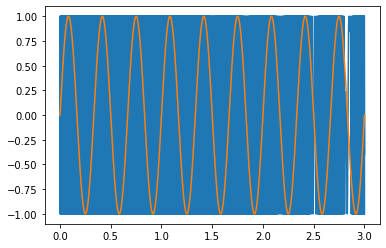

In [13]:
T=3
Fs=48000

fc=500
fm=3

t=linspace(0,T,T*Fs)

N=10

ym=sin(2*pi*fm*t)
yc=sin(2*pi*(fc+ym*N)*t)

plot(t,yc)
plot(t,ym)


Audio(yc,rate=Fs)

Frequency modulation is easier to understand by observing the result in the frequency domain but this will not be discussed until later in the course. Generate the frequency modulated signal but increase its sampling frequency to 10 kHz, carrier frequency of 1 kHz and M parameter to 100 Hz.

To view the spectrum of a function without too much hassle, we can use the following instruction:

```
_=P.specgram(y)
```   

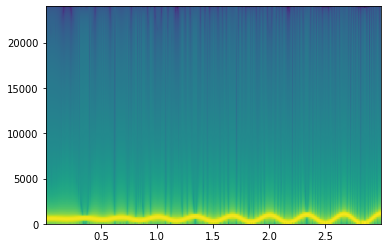

In [14]:
_=specgram(yc,Fs=Fs)

# Exercises
### (homework)

Generate a signal expressed and the sum of sines with parameters given below. The signal has the length of 2.5 seconds and is sampled at 44.1 kHz. Draw and play back the sound.

1. f=500Hz A=2 $\phi$=0 rad
2. f=1234Hz A=0.5 $\phi$=$\pi$ rad
3. f=100Hz A=1 $\phi$=115$^\circ$

In [19]:
from numpy import linspace

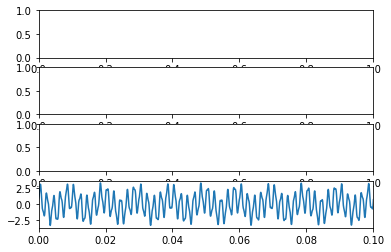

In [22]:
A1=2.; A2=0.5; A3=1.
f1=500; f2=1234; f3=100
ph1=0; ph2=pi; ph3=(115/360)*(2*pi)
T=2.5
Fs=44100

t=linspace(0,int(T),int(T*Fs))

fig, (ax1,ax2,ax3,ax4)=subplots(4,1)

y1=A1*sin(2*pi*f1*t+ph1)
y2=A2*sin(2*pi*f2*t+ph2)
y3=A3*sin(2*pi*f3*t+ph3)
sum = y1+y2+y3


plot(t,sum)
xlim(0,0.1)

from IPython.display import Audio
Audio(sum,rate=Fs)

(0.0, 0.05)

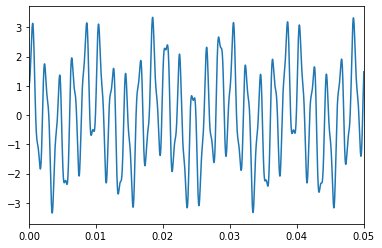

In [25]:
#Bigger plot for sum of sines
A1=2.; A2=0.5; A3=1.
f1=500; f2=1234; f3=100
ph1=0; ph2=pi; ph3=(115/360)*(2*pi)
T=2.5
Fs=44100

t=linspace(0,int(T),int(T*Fs))

y1=A1*sin(2*pi*f1*t+ph1)
y2=A2*sin(2*pi*f2*t+ph2)
y3=A3*sin(2*pi*f3*t+ph3)
sum = y1+y2+y3

plot(t,sum)
xlim(0,0.05)

Compute the odd and even component of the signal above (see lecture). Add those components back to reconstruct the original signal. To invert a sequence use the numpy `flip` method.

(0.0, 0.05)

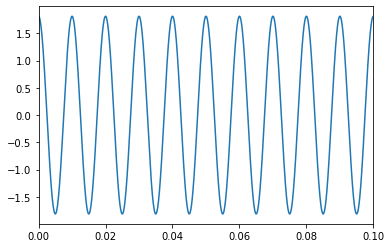

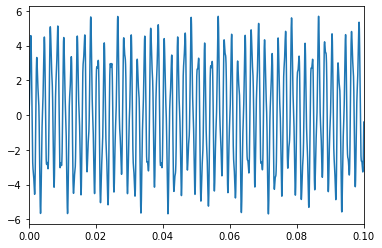

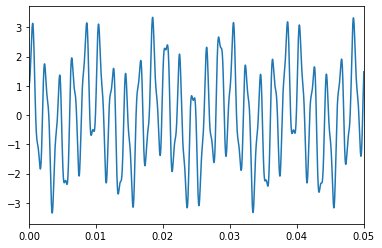

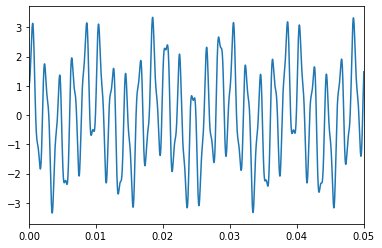

In [36]:
evenSum=sum+flip(sum)
oddSum=sum-flip(sum)

figure()
plot(t,evenSum)
xlim(0,0.1)
figure()
plot(t,oddSum)
xlim(0,0.1)
figure()
#reconstructed signal
plot(t,0.5*(evenSum+oddSum))
xlim(0,0.05)
#initial function
figure()
plot(t,sum)
xlim(0,0.05)

(0.0, 0.1)

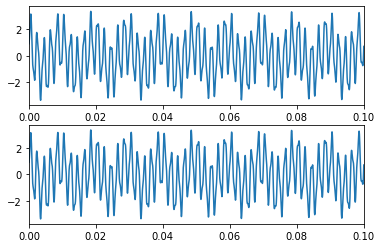

In [35]:
#Plots for sum and 1/2*(evenSum+oddSum) are the same
fig,(ax1,ax2)=subplots(2,1)
ax1.plot(t,sum)
ax2.plot(t,0.5*(evenSum+oddSum))
ax1.set_xlim(0,0.1)
ax2.set_xlim(0,0.1)

Generate one second of a signal sampled at 10 kHz using the parameters below and draw the result. Write down why you got such a result (note the scale of the graph).

1. f=100 Hz A=1 $\phi$=$\frac{\pi}{2}$
2. f=200 Hz A=2 $\phi$=$\pi$
3. f=100 Hz A=-1 $\phi$=$\frac{\pi}{2}$
4. f=200 Hz A=2 $\phi$=$2\pi$

(0.0, 0.05)

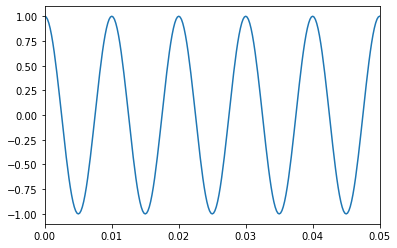

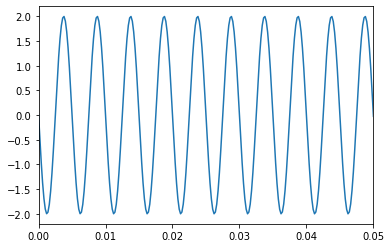

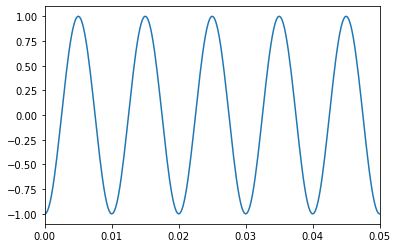

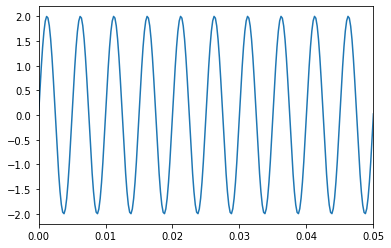

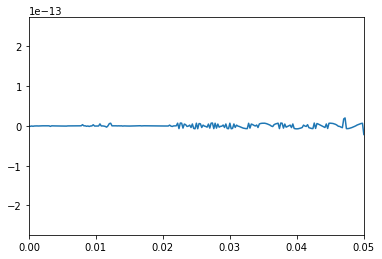

In [37]:
A1=1; A2=2; A3=-1; A4=2
f1=100; f2=200; f3=100; f4=200
ph1=pi/2; ph2=pi; ph3=pi/2; ph4=2*pi
T=1
Fs=5000

t=linspace(0,T,T*Fs)

y1=A1*sin(2*pi*f1*t+ph1)
y2=A2*sin(2*pi*f2*t+ph2)
y3=A3*sin(2*pi*f3*t+ph3)
y4=A4*sin(2*pi*f4*t+ph4)

figure()
plot(t,y1)
xlim(0,0.05)
figure()
plot(t,y2)
xlim(0,0.05)
figure()
plot(t,y3)
xlim(0,0.05)
figure()
plot(t,y4)
xlim(0,0.05)
sum = y1+y2+y3+y4
figure()
plot(t,sum)
xlim(0, 0.05)